<a href="https://colab.research.google.com/github/mateusdesu/Trababalho-Pos-IA---PLN-e-Fuzzy/blob/main/Trab_Pos_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT DE LIBS E REQUISIÇÃO DO SITE (PRODUTO DA AMAZON)

import requests
from bs4 import BeautifulSoup

#Um produto por vez, só trocar o link do produto da Amazon
url = 'https://www.amazon.com.br/Fritadeira-El%C3%A9trica-Start-Elgin-Litros/dp/B0CFG1JZGY'

requisicao = requests.get(url)

# print(requisicao.text)

site = BeautifulSoup(requisicao.text,'html.parser')


# print(site.prettify())

In [ ]:
#CAPTURAR INFORMAÇÕES: TÍTULO DA PÁGINA E PRINCIPAIS AVALIAÇÕES DO PRODUTO

title = site.find('title')
review = site.find_all('div',class_='a-expander-content reviewText review-text-content a-expander-partial-collapse-content')

print(f'Análise para: {title.text}\n')
print('Principais Avaiações do produto:\n')
print('******************************************************************************************************************************************************')
cont = 1
for(i) in review:
    print(f'Review: {cont}')
    print(i.text)
    cont+=1
    print('----------------------------------------------------------------------------------------------------------------------------------------------')

#print(review[1].text)

Análise para: Fritadeira Elétrica Start Fry Elgin 3,5 Litros Preta 110v - Air Fryer : Amazon.com.br: Cozinha

Principais Avaiações do produto:

******************************************************************************************************************************************************
Review: 1

Fritadeira boa potente , silenciosa , ótima , me surpreendeu bastante , não conhecia muito a marca, resolvi comprar e amei .

----------------------------------------------------------------------------------------------------------------------------------------------
Review: 2

Produto silencioso, compacto e muito eficiente. Me agradou por completo.

----------------------------------------------------------------------------------------------------------------------------------------------
Review: 3

Melhor compra da vida, pequena! Ocupa pouco espaço, assa muito bem as coisas! Adorei

----------------------------------------------------------------------------------------------------

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))

text = []
for i in review:
    text.append(i.text)

text = ' '.join(text)

# Dividindo o texto em palavras
words = text.split()

# Removendo stop words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Removendo pontuações
filtered_words = [word for word in filtered_words if word not in string.punctuation]

# Deixando as palavras minusculas
normalized_words = [word.lower() for word in filtered_words]

print(normalized_words)

['fritadeira', 'boa', 'potente', 'silenciosa', 'ótima', 'surpreendeu', 'bastante', 'conhecia', 'marca,', 'resolvi', 'comprar', 'amei', 'produto', 'silencioso,', 'compacto', 'eficiente.', 'agradou', 'completo.', 'melhor', 'compra', 'vida,', 'pequena!', 'ocupa', 'pouco', 'espaço,', 'assa', 'bem', 'coisas!', 'adorei', 'gente', 'bonitinha', ',funciona', 'perfeitamente', 'pequena', ',da', 'pra', 'fazer', 'porção', 'pequenas', 'quantidades', 'bom', 'demais', 'serio', 'custo', 'benefício', 'bom.', 'silenciosa,', 'designer', 'bonito', 'atualizado.', 'gostei', 'vale', 'pena.', 'fiz', 'filé', 'peixe', 'resultado', 'ótimo.', 'boa', 'qualidade', 'ótima', 'temperatura,super', 'indico.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.corpus import stopwords
import string


nltk.download('stopwords')

#Basicamente o mesmo processo anterior mas separando por frases inteiras para fazer analise de sentimento

stop_words = set(stopwords.words('portuguese'))

textArray = []


for i in review:
    textArray.append(i.text)


textArray = [text.replace('\n', ' ').strip() for text in textArray]

normalized_sentences_array = []
for text in textArray:

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = text.lower()

    filtered_words = [
        word for word in text.split()
        if word not in stop_words
    ]

    normalized_sentence = ' '.join(filtered_words)
    normalized_sentences_array.append(normalized_sentence)

print("Frases normalizadas:")
print(normalized_sentences_array)



Frases normalizadas:
['fritadeira boa potente silenciosa ótima surpreendeu bastante conhecia marca resolvi comprar amei', 'produto silencioso compacto eficiente agradou completo', 'melhor compra vida pequena ocupa pouco espaço assa bem coisas adorei', 'gente bonitinha funciona perfeitamente pequena pra fazer porção pequenas quantidades', 'bom demais serio', 'custo benefício bom silenciosa designer bonito atualizado', 'gostei vale pena fiz filé peixe resultado ótimo', 'boa qualidade ótima temperaturasuper indico']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [ ]:
from googletrans import Translator
from fuzzywuzzy import fuzz
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

translator = Translator()

def fuzzy_sentiment_analysis(sentences):
  """
  Performs sentiment analysis on translated sentences using fuzzy logic.

  Args:
    sentences: A list of sentences in Portuguese.

  Returns:
    A list of dictionaries, each containing sentiment scores (positive, negative, neutral, compound) for a sentence.
  """
  sentiment_scores = []
  analyzer = SentimentIntensityAnalyzer()

  for sentence in sentences:
    try:
      translated_sentence = translator.translate(sentence, dest='en').text
      print(f"Frase traduzida para Inglês: {translated_sentence}")
      scores = analyzer.polarity_scores(translated_sentence)
      sentiment_scores.append(scores)
    except Exception as e:
      print(f"Erro ao traduzir ou analisar a frase: {sentence}, Erro: {e}")
      sentiment_scores.append({'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0})  # Adiciona scores padrão caso ocorra erro.

  return sentiment_scores

# Analisa o sentimento das frases
sentiment_results = fuzzy_sentiment_analysis(normalized_sentences_array)

print('\n\n\n')
for i, scores in enumerate(sentiment_results):
  print(f"Frase {i+1}: {normalized_sentences_array[i]}")
  print(f"Sentimento (traduzido para Inglês): {scores}")
  print("-----------------------------------")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Frase traduzida para Inglês: Great Powerful Fryer Silent Great surprised a lot I knew brand I decided to buy loved
Frase traduzida para Inglês: efficient compact silent product pleased complete
Frase traduzida para Inglês: better buy small life occupies little space baked well things I loved it
Frase traduzida para Inglês: cute people works perfectly small to make small quantities
Frase traduzida para Inglês: very good serious
Frase traduzida para Inglês: Cost benefit good silent beautiful designer updated
Frase traduzida para Inglês: I liked it is worth making fillet fish great result
Frase traduzida para Inglês: Good quality great temperature.




Frase 1: fritadeira boa potente silenciosa ótima surpreendeu bastante conhecia marca resolvi comprar amei
Sentimento (traduzido para Inglês): {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.9501}
-----------------------------------
Frase 2: produto silencioso compacto eficiente agradou completo
Sentimento (traduzido para Inglês): {'n

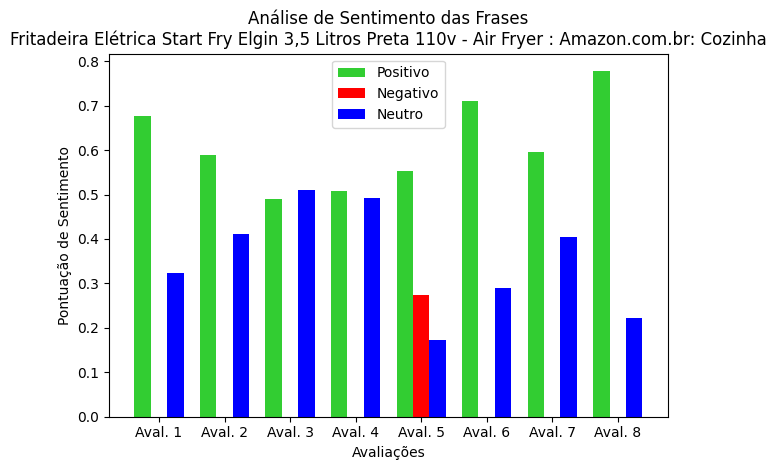

In [ ]:
import matplotlib.pyplot as plt


positive_scores = [score['pos'] for score in sentiment_results]
negative_scores = [score['neg'] for score in sentiment_results]
neutral_scores = [score['neu'] for score in sentiment_results]

# Gráfico de barras
bar_width = 0.25
r1 = range(len(positive_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, positive_scores, color='limegreen', width=bar_width, label='Positivo')
plt.bar(r2, negative_scores, color='red', width=bar_width, label='Negativo')
plt.bar(r3, neutral_scores, color='blue', width=bar_width, label='Neutro')


plt.xlabel('Avaliações')
plt.ylabel('Pontuação de Sentimento')
plt.title(f'Análise de Sentimento das Frases\n{title.text}')
plt.xticks([r + bar_width for r in range(len(positive_scores))], [f'Aval. {i+1}' for i in range(len(positive_scores))])
plt.legend()

# Plot do gráfico
plt.tight_layout()
plt.show()


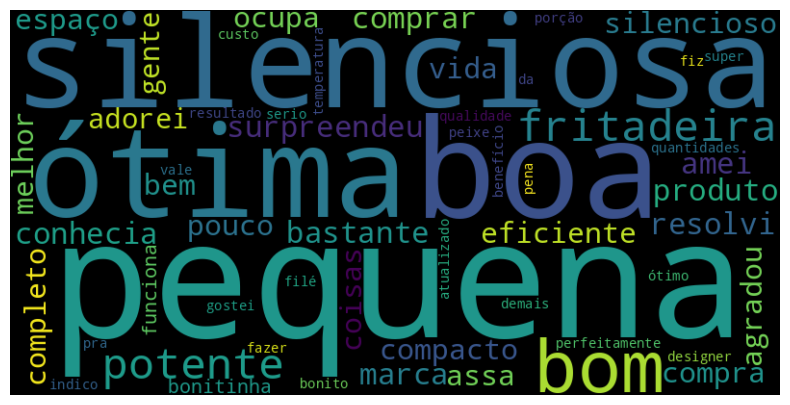

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crie uma nuvem de palavras a partir das avaliações
all_reviews = ' '.join(normalized_words)
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
